## Package Prerequisites

In [1]:
# import required libraries
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib_inline
from matplotlib.font_manager import FontProperties
from matplotlib import image
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

## Data Preparation

In [2]:
# export required data frame
df = pd.read_csv("data/refined/merged_match_results.csv")

# find for each team xG For and xG against
all_xg_for = pd.concat([df['home_np_xg'], df['away_np_xg']])
all_xg_against = pd.concat([df['away_np_xg'], df['home_np_xg']])

## Plot Extras

In [4]:
# define a dictionary of colors for each team
team_color = {'Malmö FF':['skyblue', 'white'], 
              'AIK':['darkblue', 'yellow'],  
              'Djurgården':['skyblue', 'darkblue'], 
              'IF Elfsborg':['yellow', 'black'], 
              'Hammarby':['white', 'darkgreen'],
              'Kalmar FF':['red', '#EBCD57'], 
              'IFK Norrköping FK':['white', 'blue'], 
              'IFK Göteborg':['blue', '#EBCD57'], 
              'Mjällby AIF':['#FCDF51', 'black'],
              'Varbergs BoIS FC':['#53B663', 'black'], 
              'IK Sirius FK':['blue', 'black'], 
              'BK Häcken':['black', '#FFF275'], 
              'Degerfors IF':['white', 'red'],
              'Halmstad':['#6B91EB', 'black'], 
              'Örebro':['white', 'black'], 
              'Östersund':['red', 'black']}

# create a list of teams, according to their ranking, to iterate over
team_ranks = ['Malmö FF', 'AIK', 'Djurgården', 'IF Elfsborg', 'Hammarby',
'Kalmar FF', 'IFK Norrköping FK', 'IFK Göteborg', 'Mjällby AIF',
'Varbergs BoIS FC', 'IK Sirius FK', 'BK Häcken', 'Degerfors IF',
'Halmstad', 'Örebro', 'Östersund']

## Design

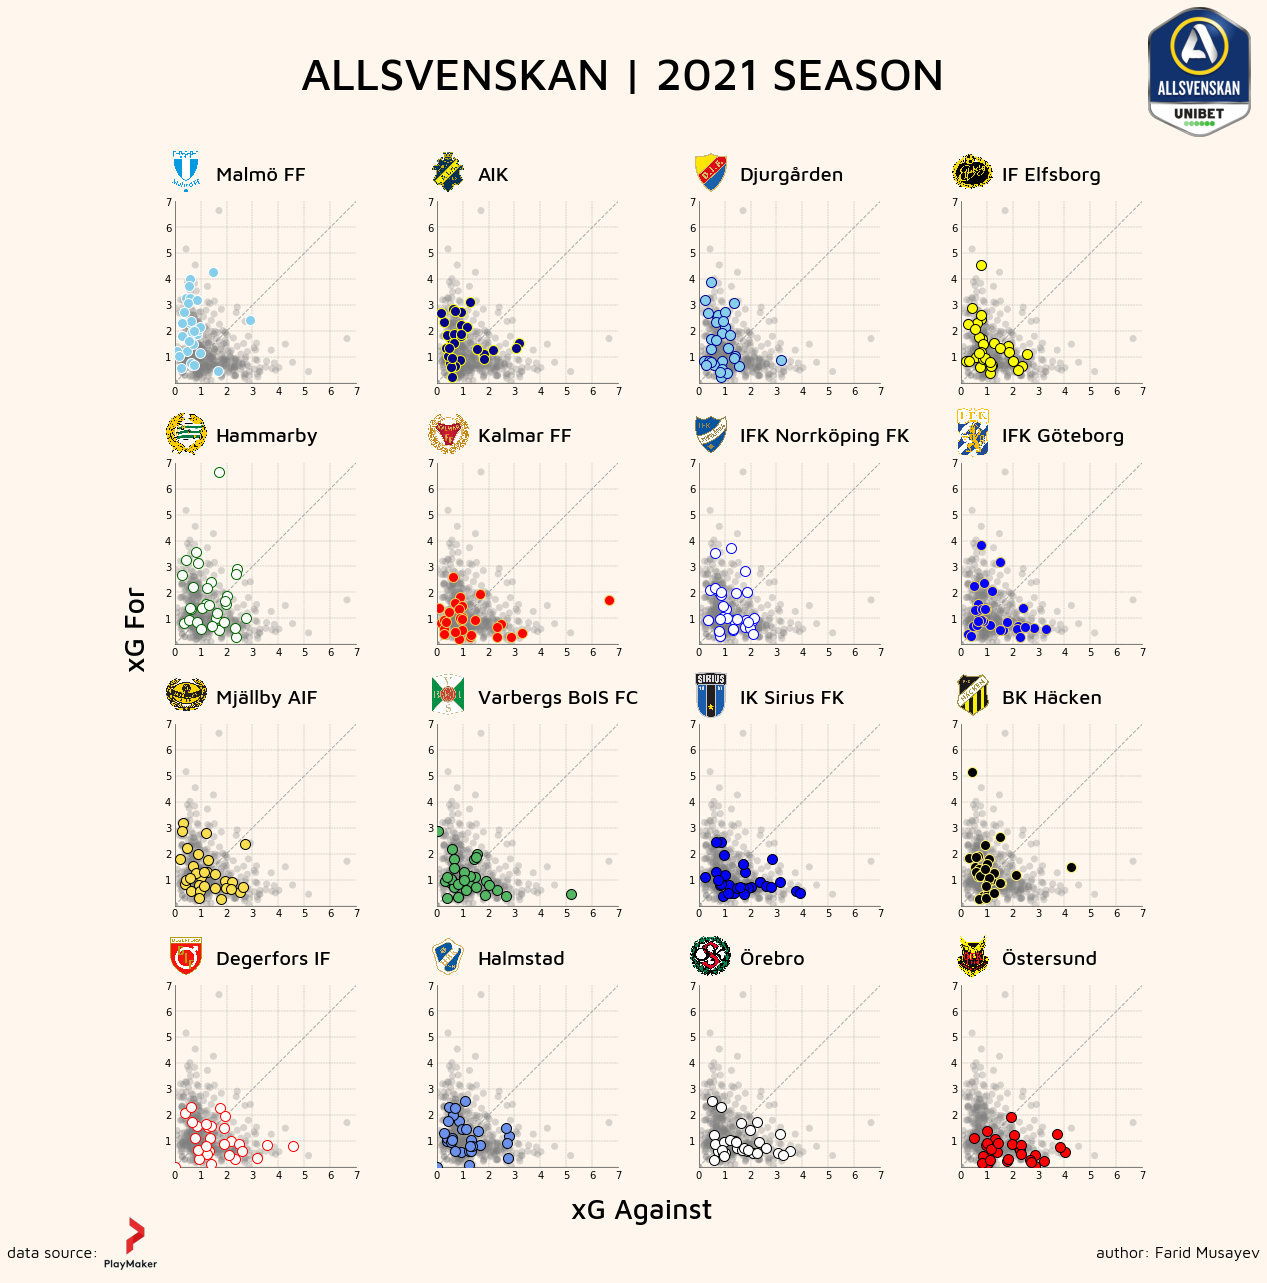

In [6]:
# list of club logo paths to iterate over 
files = os.listdir('images/club_logos/')

fig, ax = plt.subplots(nrows = 4, ncols = 4, figsize = (18, 18), 
                            gridspec_kw={'hspace': 0.44})

# figure face color equal to axis face color
fig.set_facecolor("#FFF7EE")

# Font Properties:
# (x, y) axis labels
label_fps = FontProperties(family = 'Maven Pro', size = 28, weight = 'medium')
# each plot title
ax_fps = FontProperties(family = 'Maven Pro', size = 20, weight = 'medium')
# figure title
fig_fps = FontProperties(family = 'Maven Pro', size = 45, weight = 'medium')
# data source:
ds_fps = FontProperties(family = 'Maven Pro', size = 16)


ind = 0
for i in range(4):
    for j in range(4):
        
        # grid settings
        ax[i, j].grid(color='#62625F', ls = '-.', lw = 0.25, zorder = 0)

        # face color of axis
        ax[i, j].set_facecolor("#FFF7EE")
        
        # plot dashed line 
        x = np.array([0, 7])
        y = np.array([0, 7])
        ax[i, j].plot(x, y, c = 'darkgray', ls = '--', lw = 1, zorder = 3)

        # data filtering steps: 
        # 1.take a team from a list and filter data frame 'team_df'
        team_df = df[(df['home'] == team_ranks[ind]) | (df['away'] == team_ranks[ind])]
        
        # 2. filter non-penalty xG for
        team_df[team_df['home'] == team_ranks[ind]]['home_np_xg']
        team_df[team_df['away'] == team_ranks[ind]]['away_np_xg']
        xg_for = pd.concat([team_df[team_df['home'] == team_ranks[ind]]['home_np_xg'],
                 team_df[team_df['away'] == team_ranks[ind]]['away_np_xg']])
        
        # 3. filter non-penalty xG against
        team_df[team_df['home'] == team_ranks[ind]]['away_np_xg']
        team_df[team_df['away'] == team_ranks[ind]]['home_np_xg']
        xg_against = pd.concat([team_df[team_df['home'] == team_ranks[ind]]['away_np_xg'], 
                     team_df[team_df['away'] == team_ranks[ind]]['home_np_xg']])

        
        ax[i, j].scatter(all_xg_against, all_xg_for, c = 'gray', alpha = 0.3, s = 50, edgecolor = 'none', zorder = 3)
        ax[i, j].scatter(xg_against, xg_for, s = 100, c = team_color[team_ranks[ind]][0], 
                         edgecolor = team_color[team_ranks[ind]][1], zorder = 3)

        # set limit for x and y axis
        ax[i, j].set_xlim(0, 7)
        ax[i, j].set_ylim(0, 7)
        ax[i, j].set_xticks(np.arange(0, 8, 1))
        ax[i, j].set_xticks(np.arange(0, 8, 1))
        ax[i, j].set_aspect('equal')
        
        # remove tick lines from both axis
        ax[i, j].tick_params(length = 0)

        # remove '0' on y-axis
        ax[i, j].yaxis.get_major_ticks()[0].label1.set_visible(False)
        
        # remove top and right spines
        ax[i, j].spines[['top', 'right']].set_visible(False)
        
        # spines color
        spines_color = '#62625F'
        ax[i, j].spines['bottom'].set_color(spines_color)
        ax[i, j].spines['top'].set_color(spines_color) 
        ax[i, j].spines['right'].set_color(spines_color)
        ax[i, j].spines['left'].set_color(spines_color)
        
        # font dictionary
        font3 = {'family': 'monospace', 'weight': 'bold', 'size': 14}
        
        # title for each plot
        ax[i, j].set_title(team_ranks[ind], loc = 'left', x = 0.225, y = 1.08, fontproperties = ax_fps)
        
        # remove topmost and rightmost gridlines:
        # retrieve all x and y gridlines
        y_gridlines = ax[i, j].get_ygridlines()
        x_gridlines = ax[i, j].get_xgridlines()
        # select topmost and rightmost and remove them
        y_last = y_gridlines[-1]
        y_last.set_visible(False)
        x_last = x_gridlines[-1]
        x_last.set_visible(False)
        
        # club logo settings:
        club_logo = image.imread("images/club_logos/" + files[ind])
        # add into image box
        club_logo = OffsetImage(club_logo, zoom = 0.04)
        # assign axis to image box
        club_logo.image.axes = ax[i, j]
        # set coordinates
        ab = AnnotationBbox(club_logo, xy = (0.065, 1.16), xycoords = 'axes fraction', frameon = False)
        # add to axis
        ax[i, j].add_artist(ab)
        
        # update index for a list of teams
        ind = ind + 1
        

# league logo settings:
league_img = image.imread("images/other_logos/allsvenskan_logo.png")
league_logo = fig.add_axes([0.88, 0.88, 0.1, 0.1])
league_logo.set_axis_off()
league_logo.imshow(league_img, aspect = "equal")        

# figure title and labels
fig.supxlabel('xG Against', fontproperties = label_fps, y = 0.04)
fig.supylabel('xG For', fontproperties = label_fps, x = 0.1)
fig.suptitle('ALLSVENSKAN | 2021 SEASON', x = 0.485, y = 0.94, fontproperties = fig_fps)

# annotations and logo for data source
fig.text(0.01, 0.015, r"data source:", fontproperties = ds_fps)
ds_img = image.imread("images/other_logos/plm.png")
ds_logo = fig.add_axes([0.08, 0.001, 0.05, 0.05])
ds_logo.set_axis_off()
ds_logo.imshow(ds_img, aspect = "equal") 

# author annotations:
fig.text(0.85, 0.015, r"author: Farid Musayev", fontproperties = ds_fps)

# create a space for a title and left/right axis
fig.subplots_adjust(bottom = 0.085, top = 0.83)

plt.show()

# save figure
fig.savefig('xg_subplots.png', dpi = 350, transparent = False)

To view this plot in a high resolution, please follow this [link.](https://raw.githubusercontent.com/faridmusayev/Swedish_Football_Analytics/main/allsvenskan/plots/xg_subplots.png)